学习sympy时根据[官方文档](https://docs.sympy.org/latest/index.html)编写的笔记。  
sympy是一个纯python写成的符号运算库，它有29万行代码。  
学习路线：
1. 按顺序阅读官方文档，边读边操作
2. 阅读官方文档module部分，并阅读对应部分的代码
  * 一边调试，一边阅读代码，使用winpdb工具，或者使用IDE的调试工具

官方文档导读：
* SymPy Tutorial:这是最主要的教程，它的特点是简单易懂，不涉及实现，只涉及用法。
* Gotchas and Pitfalls:Sympy中的易混淆点和程序员必须明白的概念。
* SymPy User’s Guide:Sympy用户指南，它的特点是简短，提纲契领，宏观笼统。
* SymPy Modules Reference:这是API详细介绍，涉及全部细节。
* 其余：其余内容都不重要，可以跳过。其中特殊主题中对[有限差商](https://docs.sympy.org/latest/special_topics/finite_diff_derivatives.html)进行了介绍。  

sympy相关的工具：
* isympy是ipython中专门给sympy封装的命令行工具。  
* sage是python世界中的matlab，maple，mathematic。 

# 快速浏览

In [4]:
from sympy import *
import numpy as np

# 使用这句话进行初始化，可以使公式变得美观
init_printing()

In [4]:
x=Symbol('x')

In [13]:
# 求极限
limit(ss.sin(x)/x,x,0)

In [14]:
# 求不定积分
integrate(1/(x**2+3*x+2),x)

In [29]:
# 求定积分
integrate(sin(x*x),(x,-oo,oo))

In [30]:
# 高斯函数没有原函数，看它如何积分
integrate(exp(-x*x),(x,1,2))

In [28]:
# 对高斯函数求导数
now=exp(-x*x)
for i in range(5):
    now=diff(now,x)# 对x求导
    print(now)

-2*x*exp(-x**2)
4*x**2*exp(-x**2) - 2*exp(-x**2)
-8*x**3*exp(-x**2) + 12*x*exp(-x**2)
16*x**4*exp(-x**2) - 48*x**2*exp(-x**2) + 12*exp(-x**2)
-32*x**5*exp(-x**2) + 160*x**3*exp(-x**2) - 120*x*exp(-x**2)


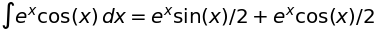

In [17]:
# 积分也可以是一个类
a=Integral(exp(x)*cos(x))
# Eq表示等号，它也是一种运算符号，在sympy中，一切皆运算符号
Eq(a,a.doit())

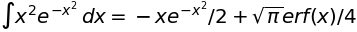

In [19]:
a=Integral(x*x*exp(-x*x))
Eq(a,a.doit())

In [23]:
x,y=symbols('x y')
z=(x+2*y)*x
# 展开与因式分解
expand(z),factor(z)

In [32]:
# 解方程
solve(x*x-2,x)

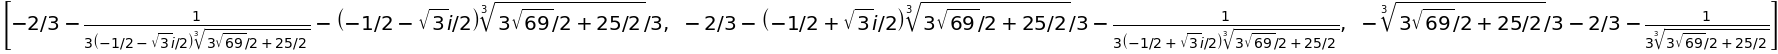

In [34]:
solve(x**3+2*x**2+x+1,x)

In [91]:
factor(x**2+x+1),factor(x**2+2*x+1)

In [59]:
solve(x**7+3*x**3+2*x+1,x)

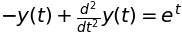

In [40]:
# 求解差分方程
y=Function('y')
t=symbols('t')
diff_equation=Eq(y(t).diff(t,t)-y(t),exp(t))
diff_equation 

In [41]:
dsolve(diff_equation,y(t))

In [57]:
# 矩阵求特征值
Matrix([[1,2],[3,4]]).eigenvals()
# 输出中key表示特征值，value表示特征值的重数

In [122]:
# sympy 中判断相等
x.equals(x),(x*(x+1)).equals(x*x+x)

(True, True)

In [126]:
# 分数
Integer(1)/Integer(3),Rational(1,3),sympify('1/3')

In [70]:
# 直接代入字符串，simplify函数能够将字符串转换成表达式
simplify('(x+3)**3-(x-2)**2')

# 替换，代入，求值

下面开始讲三种代入
* subs：在sympy中继续玩，用一个表达式替换另一个表达式
* evalf:与数值发生关联，用数值替换符号
* lambdify:与numpy发生关联

In [129]:
# 把一个符号替换成另一个符号
x,y=symbols('x,y')
z=sin(x)
z

In [130]:
z.subs(x,y)

In [131]:
z.subs(x,y*y)

In [132]:
# 可以代入数字
z.subs(x,3),z.subs(x,Integer(3))

In [68]:
# 同时替换多个变量
z=sin(x*y)
z.subs([(x,3),(y,4)])

In [74]:
# 可以对z求具体数值，如果传入的参数不对，就保持原样
z.evalf(),z.evalf(3),z.evalf(subs={x:3,y:4}),pi.evalf(10)

In [77]:
import numpy as np
a=np.arange(10)
x=symbols('x')
y=sin(x)
f=lambdify(x,y,'math')
print(f(3))# f(a)会报错
ff=lambdify(x,y,'numpy')
ff(a)

0.1411200080598672


array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [80]:
# lambdify还可以自定义求值函数
fff=lambdify(x,y,{'sin':np.sin})
fff(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

# 展开，化简，变换

展开

In [66]:
# 把三角函数展开成sin和cos的组合
expand_trig(sin(3*x))

In [67]:
# 多项式展开
expand((x**2+x+1)**3)

In [82]:
x,y=symbols('x y',integer=True)
f,h=symbols('f h',cls=Function)
f(x),h(y)

simplify函数用于化简，它会尝试所有的化简方法，并选择“最简”的那一种，其中最简的定义是sympy内置的，可能并不符合用户期望。
simplify会尝试sympy内置的化简变换，是一种尽力而为的函数，对化简结果不做任何保证。


In [86]:
simplify(sin(x)**2 + cos(x)**2)

In [87]:
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

In [88]:
simplify(gamma(x)/gamma(x - 2))

In [92]:
simplify(Rational(3,6))

In [93]:
factor(x**2+y**2+2*x*y)

In [98]:
factor(sin(x)**2+sin(x)+1)

In [96]:
factor_list(2*x**2-2*y**2)

In [99]:
factor(21)

In [107]:
# 合并同类项，它的行为是确定的
z=collect(3*x+4*x**2+7*x+(x+1)**2,x**2)
z

In [108]:
z.coeff(x,2)

In [109]:
# cancel用于化简分式形式的多项式
cancel((x**2+2*x+1)/(x**2-1))

In [110]:
# simplify的功能包含cancel，但是cancel语义更明确，行为更可控
simplify((x**2+2*x+1)/(x**2-1))

In [111]:
cancel(x**2-1)

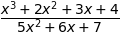

In [114]:
y=(x**3+2*x**2+3*x+4)/(5*x**2+6*x+7)
y

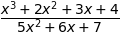

In [115]:
simplify(y)

In [126]:
# 会报错，原因不明
apart(y),apart(4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x) 

PolynomialError: can't construct polynomials from 4*x**3 + 21*x**2 + 10*x + 12, x**4 + 5*x**3 + 5*x**2 + 4*x

三角函数

In [129]:
acos(3),cos(acos(3)),tan(4),atan(5),sin(6),sec(7),csc(8),cot(9)

In [136]:
cosh(x),sinh(x),tanh(x)

In [137]:
trigsimp(sin(x)/cos(x))

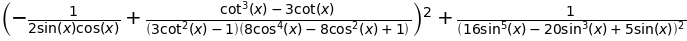

In [142]:
z=expand_trig((cot(3*x)*sec(4*x)-csc(2*x))**2+(1/sin(5*x))**2)
z

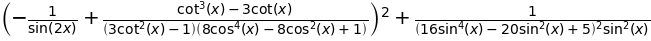

In [143]:
trigsimp(z)

有些变换只能作用于正数，有些变换只能作用于整数，因此定义symbol时需要设定symbol的类型，这样sympy才能更有效的化简

In [147]:
w=symbols('w')# 默认情况下w是复数
x=symbols('x',integer=True)
y=symbols('y',positive=True)
z=symbols('z',real=True)# z为实数

In [148]:
# sqrt函数只是1/2次幂的简写形式，它们本质上是同一套东西
x**Rational(1,2)==sqrt(x)

True

In [154]:
#幂化简有三个公式
x,a,b=symbols('x a b')
# 此式永远正确
Eq(x**a*x**b,x**(a+b))

In [157]:
# 此式适用于x，y为正数的情况，并且a为实数
Eq(x**a*y**a,(x*y)**a)

In [158]:
# 只有在b为整数的情况下才成立
Eq((x**a)**b,x**(a*b))

In [159]:
# powsimp应用幂公式1和幂公式2进行化简
powsimp(x**a*y**a)

In [161]:
# 当x和y不满足大于0的条件时，无法化简，但是可以强制化简
x,y=symbols('x y',real=True)
powsimp(x**a*y**a),powsimp(x**a*y**a,force=True)

In [169]:
# powsimp的逆变换
# 公式一的逆变换，它没有force参数，因为这个公式是恒成立的
expand_power_exp((x**(a+b)))

In [166]:
# 公式二的逆变换，它有force参数
x,y=symbols('x y',positive=True)
expand_power_base((x*y)**a),expand_power_base((x*y)**a,force=True)

In [171]:
# 使用公式三进行化简
powdenest((x**a)**b),powdenest((x**a)**b,force=True)

In [173]:
b=symbols('b',interger=True)
powdenest((x**a)**b)

对数函数公式有两个

In [177]:
x,y=symbols('x y',positive=True)
n=symbols('n',real=True)
Eq(ln(x*y),ln(x)+ln(y)),Eq(ln(x**n),n*ln(x))

In [178]:
z=expand_log(ln(x*y**3))
z

In [180]:
# expand_log的逆变换是logcombine
logcombine(ln(x)+3*ln(y))

sympy中包含很多特殊函数

In [184]:
# 阶乘
n,k=symbols('n k')
factorial(n)

In [185]:
# 组合
binomial(n,k)

In [186]:
# gamma函数
gamma(n)

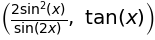

In [191]:
# rewrite就是用一个函数去表达另一个函数，这是一个尽力而为服务
tan(x).rewrite(sin),tan(x).rewrite(ln)

In [192]:
# 特殊函数都有特殊的化简方法
expand_func(gamma(x+3))

In [195]:
# gamma函数化简
gammasimp(gamma(x)/gamma(x-3))

In [196]:
# 组合函数化简
combsimp(binomial(n+1, k+1)/binomial(n, k))

In [197]:
symbols('a0:5')

In [ ]:
# 这样会报错，因为symbols会返回6个符号
a,b=symbols('a0:5 b')
a,b

下面做一个连分数小练习，这个练习没有明确目的，只为了熟悉sympy API。

In [211]:
from typing import List
def get_lianfenshu(a:List):
    s=1/a[-1]
    for i in range(len(a)-2,-1,-1):
        s=1/(s+a[i])
    return s

In [213]:
get_lianfenshu([1,2,3,4])

In [214]:
get_lianfenshu([Integer(i) for i in range(4)])

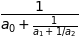

In [215]:
a=symbols('a0:3')
y=get_lianfenshu(a)
y

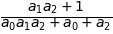

In [216]:
cancel(y)

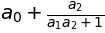

In [219]:
apart(1/y,a[0])

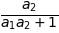

In [220]:
apart(1/y-a[0],a[1])

# 微积分

In [221]:
x=symbols('x')
y=sin(x)*ln(x)
y.diff(x)

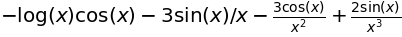

In [222]:
# 求三次导数
y.diff(x,3)

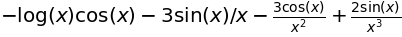

In [223]:
# 求三次导
y.diff(x,x,x)

In [226]:
# 二阶偏导
x,y=symbols('x,y')
z=sin(x)*cos(y)
z.diff(x,y),diff(z,x,y)

sympy有两种API:
* 第一种是函数，例如integral，diff等
* 第二种是类，例如Integeral，Derivative等，一句Derivative().doit()就相当与diff

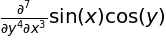

In [229]:
p=Derivative(z,x,3,y,4)
p

In [230]:
p.doit()

In [232]:
# 下面开始研究积分
integrate(z,x),integrate(z,y)

In [233]:
integrate(exp(-x),(x,0,oo))

In [234]:
oo,-oo # sympy 真是天才的设计，这个变量名真奇妙

In [236]:
integrate(exp(-(x**2+y**2)),(x,0,oo),(y,0,oo))

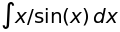

In [239]:
# 有些函数不可积
integrate(x/sin(x))

In [242]:
#第二类API
Integral(z,x,y).doit()

下面开始研究极限

In [245]:
limit(x/sin(x),x,0),limit(x/sin(x),x,0,'-'),limit(x/sin(x),x,0,'+'),

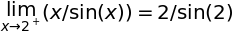

In [247]:
z=Limit(x/sin(x),x,2,'+')
Eq(z,z.doit())

泰勒展开
指对连，三角断。
三角对数隔一换，
对数函数一二三，
三角指数有感叹。

In [248]:
# 在x=0处展开4项
exp(x).series(x,0,4)

In [249]:
# 在x=1处展开三项
exp(x).series(x,1,3)

In [250]:
# 大O表示法
O(x**4)

In [251]:
exp(x).series(x,1,3).removeO()

有限差分是一种求解微分方程组的数值解法，见官方文档。

# 解方程
* 求解一元方程solveset()，solveset只能接受一个表达式
* 求解线性方程组linsolve()
* 求解非线性方程组nonlinsolve()

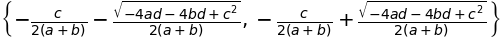

In [253]:
a,b,c,d,x=symbols('a,b,c,d,x')
# 二次方程求根公式,solve如果没有Eq则表示此式等于0
solveset(a*x**2+b*x**2+c*x+d,x)

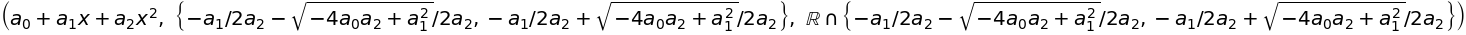

In [266]:
# n次方程求根公式
n=3
a=symbols(f'a0:{n}')
x=symbols('x')
s=a[0]
for i in range(1,n):
    s+=a[i]*x**i
s,solveset(s,x),solveset(s,x,domain=S.Reals)

In [263]:
solveset(x**2-x,x)

In [264]:
solveset(x**2+1,x)

In [265]:
# 此方程在实数域无解
solveset(x**2+1,x,domain=S.Reals)

In [269]:
# 全部数域，每个数域其实就是一个特殊符号，集合之间可以求交集
dir(S)

['Catalan',
 'ComplexInfinity',
 'Complexes',
 'EmptySet',
 'EulerGamma',
 'Exp1',
 'GoldenRatio',
 'Half',
 'IdentityFunction',
 'ImaginaryUnit',
 'Infinity',
 'Integers',
 'NaN',
 'Naturals',
 'Naturals0',
 'NegativeInfinity',
 'NegativeOne',
 'One',
 'Pi',
 'Reals',
 'TribonacciConstant',
 'UniversalSet',
 'Zero',
 '__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_classes_to_install',
 'false',
 'register',
 'true']

In [270]:
# 解不唯一
solveset(sin(x)-1,x)

linsolve()接受三种类型的参数：
* 代数式列表
* 矩阵
* 矩阵A和结果b元祖

In [305]:
a,b,c,d,x,y=symbols('a,b,c,d,x,y')
linsolve([a*x+b*y,c*x+d*y],(x,y))

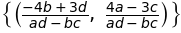

In [274]:
linsolve([Eq(a*x+b*y,3),Eq(c*x+d*y,4)],(x,y))

In [307]:
# 方程返回多组解
a,b,c,x,y,z=symbols('a,b,c,x,y,z')
linsolve(Matrix([[a,b,c,3]]),(x,y,z))

In [282]:
# 不满秩的线性方程组
linsolve([Eq(a*x+b*y,1)],[x,y])

In [308]:
# 用solve却返回空，说明solve不能求解线性方程组
a,b,c,d,e,f,x,y,z=symbols('a,b,c,d,e,f,x,y,z')
solve(Matrix([[a,b,c,3],[d,e,f,4]]),x)

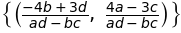

In [280]:
ma=Matrix([[a,b,3],[c,d,4]])
linsolve((ma[:,:-1],ma[:,-1]),(x,y))

In [289]:
x,y=symbols('x,y')
# 使用solveset却会报错，因为solveset只能求一个未知量
solve(Eq(sin(x)-cos(y),0),(x,y))

In [339]:
# solveset和nonlinsolve不能求解三角函数方程
solveset(Eq(sin(x)-cos(y),0),x),nonlinsolve([Eq(sin(x)-cos(y),0)],x)

In [294]:
solve(Eq(sin(x)-cos(y),0),x)

In [337]:
# solve函数可以返回字典，solve只能解决一个自变量
solve(Eq(sin(x)-cos(y),0),(x,y),dict=True)

In [342]:
triangle_system=[Eq(sin(x)+cos(x),1),Eq(sin(x+y),2)]
triangle_system

In [343]:
solve(triangle_system,(x,y),dict=True)

In [346]:
# nonlinsolve只能求一个变量，并且这个结果没有考虑第二个式子
nonlinsolve(triangle_system,x)

In [347]:
# solveset只能接受一个代数表达式，不能接受一个方程组。solveset的未知量只能求一个变量，不能求多个变量
solveset(triangle_system[0],x)

solve()是唯一能够正确解决三角方程组的函数

In [333]:
# 方程求根
x=symbols('x')
system=(x-1)**2*(x+1)
solveset(system,x),roots(system),solve(system,x),solve(system,x,dict=True)
# roots返回来的字典key表示根，value表示几重根

In [334]:
solve([sin(x + y), cos(x - y)], [x, y])

求解微分方程

In [325]:
f=Function('f')
x=symbols('x')
dsolve(f(x).diff(x)*(1 - sin(f(x))) - 1, f(x))

# 矩阵

In [371]:
import numpy as np
a=np.arange(9).reshape(3,3)
a=Matrix(a)
a,a.shape

⎛⎡0  1  2⎤        ⎞
⎜⎢       ⎥        ⎟
⎜⎢3  4  5⎥, (3, 3)⎟
⎜⎢       ⎥        ⎟
⎝⎣6  7  8⎦        ⎠

In [366]:
a.row(0),a.col(-1),a[0,:],a[:,-1]

⎛           ⎡2⎤             ⎡2⎤⎞
⎜           ⎢ ⎥             ⎢ ⎥⎟
⎜[0  1  2], ⎢5⎥, [0  1  2], ⎢5⎥⎟
⎜           ⎢ ⎥             ⎢ ⎥⎟
⎝           ⎣8⎦             ⎣8⎦⎠

row_del,col_del是在原来位置上进行操作
row_insert,col_insert是copy一份新数据

In [372]:
a.row_del(0)
a

⎡3  4  5⎤
⎢       ⎥
⎣6  7  8⎦

In [373]:
a=a.row_insert(0,Matrix([[0,1,2]]))
a

⎡0  1  2⎤
⎢       ⎥
⎢3  4  5⎥
⎢       ⎥
⎣6  7  8⎦

In [374]:
a.col_del(0)
a

⎡1  2⎤
⎢    ⎥
⎢4  5⎥
⎢    ⎥
⎣7  8⎦

In [375]:
# 插入列向量Matrix(一维数组)会自动构建成列向量
a=a.col_insert(0,Matrix([0,3,6]))
a

In [378]:
# 插入多列
a=a.col_insert(0,Matrix([[9,13],[10,14],[11,15]]))
a

矩阵的基本操作

In [388]:
a=Matrix(np.arange(4).reshape(2,2))
# 转置，行列式的值
a.T,a.det()

⎛⎡0  2⎤    ⎞
⎜⎢    ⎥, -2⎟
⎝⎣1  3⎦    ⎠

In [389]:
# 乘方
a**2

⎡2  3 ⎤
⎢     ⎥
⎣6  11⎦

In [ ]:
# 逆,如果矩阵不满秩就会抛出异常
a**-1

矩阵的创建

In [392]:
eye(2),ones(2),zeros(2),diag(1,2,3)

⎛                        ⎡1  0  0⎤⎞
⎜⎡1  0⎤  ⎡1  1⎤  ⎡0  0⎤  ⎢       ⎥⎟
⎜⎢    ⎥, ⎢    ⎥, ⎢    ⎥, ⎢0  2  0⎥⎟
⎜⎣0  1⎦  ⎣1  1⎦  ⎣0  0⎦  ⎢       ⎥⎟
⎝                        ⎣0  0  3⎦⎠

In [395]:
# 对角矩阵的构建很灵活
a=diag(1,2,3,ones(2),eye(3),Matrix([7,8,9]))
a,a.shape

⎛⎡1  0  0  0  0  0  0  0  0⎤         ⎞
⎜⎢                         ⎥         ⎟
⎜⎢0  2  0  0  0  0  0  0  0⎥         ⎟
⎜⎢                         ⎥         ⎟
⎜⎢0  0  3  0  0  0  0  0  0⎥         ⎟
⎜⎢                         ⎥         ⎟
⎜⎢0  0  0  1  1  0  0  0  0⎥         ⎟
⎜⎢                         ⎥         ⎟
⎜⎢0  0  0  1  1  0  0  0  0⎥         ⎟
⎜⎢                         ⎥         ⎟
⎜⎢0  0  0  0  0  1  0  0  0⎥, (11, 9)⎟
⎜⎢                         ⎥         ⎟
⎜⎢0  0  0  0  0  0  1  0  0⎥         ⎟
⎜⎢                         ⎥         ⎟
⎜⎢0  0  0  0  0  0  0  1  0⎥         ⎟
⎜⎢                         ⎥         ⎟
⎜⎢0  0  0  0  0  0  0  0  7⎥         ⎟
⎜⎢                         ⎥         ⎟
⎜⎢0  0  0  0  0  0  0  0  8⎥         ⎟
⎜⎢                         ⎥         ⎟
⎝⎣0  0  0  0  0  0  0  0  9⎦         ⎠

In [405]:
a=Matrix(np.random.randint(1,9,(3,5)))
a

⎡2  6  6  2  2⎤
⎢             ⎥
⎢2  8  7  3  1⎥
⎢             ⎥
⎣6  2  2  3  6⎦

In [406]:
# 把矩阵左上角化为单位阵
a.rref()

⎛⎡1  0  0  7/16  1 ⎤           ⎞
⎜⎢                 ⎥           ⎟
⎜⎢          13     ⎥           ⎟
⎜⎢0  1  0   ──   -1⎥, (0, 1, 2)⎟
⎜⎢          16     ⎥           ⎟
⎜⎢                 ⎥           ⎟
⎝⎣0  0  1  -5/8  1 ⎦           ⎠

矩阵的nullspace表示解空间中的任意常数向量

In [407]:
# 矩阵的列空间和行空间
a.nullspace()

⎡⎡-7/16⎤      ⎤
⎢⎢     ⎥  ⎡-1⎤⎥
⎢⎢-13  ⎥  ⎢  ⎥⎥
⎢⎢──── ⎥  ⎢1 ⎥⎥
⎢⎢ 16  ⎥  ⎢  ⎥⎥
⎢⎢     ⎥, ⎢-1⎥⎥
⎢⎢ 5/8 ⎥  ⎢  ⎥⎥
⎢⎢     ⎥  ⎢0 ⎥⎥
⎢⎢  1  ⎥  ⎢  ⎥⎥
⎢⎢     ⎥  ⎣1 ⎦⎥
⎣⎣  0  ⎦      ⎦

In [411]:
a.columnspace()

⎛⎡⎡2⎤  ⎡6⎤  ⎡6⎤⎤    ⎞
⎜⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥    ⎟
⎜⎢⎢2⎥, ⎢8⎥, ⎢7⎥⎥, []⎟
⎜⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥    ⎟
⎝⎣⎣6⎦  ⎣2⎦  ⎣2⎦⎦    ⎠

In [416]:
a.T,a.T.columnspace()

⎛⎡2  2  6⎤  ⎡⎡2⎤  ⎡2⎤  ⎡6⎤⎤⎞
⎜⎢       ⎥  ⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥⎟
⎜⎢6  8  2⎥  ⎢⎢6⎥  ⎢8⎥  ⎢2⎥⎥⎟
⎜⎢       ⎥  ⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥⎟
⎜⎢6  7  2⎥, ⎢⎢6⎥, ⎢7⎥, ⎢2⎥⎥⎟
⎜⎢       ⎥  ⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥⎟
⎜⎢2  3  3⎥  ⎢⎢2⎥  ⎢3⎥  ⎢3⎥⎥⎟
⎜⎢       ⎥  ⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥⎟
⎝⎣2  1  6⎦  ⎣⎣2⎦  ⎣1⎦  ⎣6⎦⎦⎠

In [5]:
a=Matrix(np.random.randint(1,9,(2,2)))
a.eigenvals()

In [6]:
a.eigenvects()

⎡⎛            ⎡⎡   -4    ⎤⎤⎞  ⎛            ⎡⎡   -4    ⎤⎤⎞⎤
⎢⎜            ⎢⎢─────────⎥⎥⎟  ⎜            ⎢⎢─────────⎥⎥⎟⎥
⎢⎜5   √57     ⎢⎢  3   √57⎥⎥⎟  ⎜5   √57     ⎢⎢  √57   3⎥⎥⎟⎥
⎢⎜─ - ───, 1, ⎢⎢- ─ + ───⎥⎥⎟, ⎜─ + ───, 1, ⎢⎢- ─── - ─⎥⎥⎟⎥
⎢⎜2    2      ⎢⎢  2    2 ⎥⎥⎟  ⎜2    2      ⎢⎢   2    2⎥⎥⎟⎥
⎢⎜            ⎢⎢         ⎥⎥⎟  ⎜            ⎢⎢         ⎥⎥⎟⎥
⎣⎝            ⎣⎣    1    ⎦⎦⎠  ⎝            ⎣⎣    1    ⎦⎦⎠⎦

In [7]:
# 对角化，矩阵的分解A=P*D*P^-1
P,D=a.diagonalize()

In [9]:
P

⎡  √57   1    1   √57⎤
⎢- ─── - ─  - ─ + ───⎥
⎢   6    2    2    6 ⎥
⎢                    ⎥
⎣    1          1    ⎦

In [10]:
D

⎡5   √57         ⎤
⎢─ - ───     0   ⎥
⎢2    2          ⎥
⎢                ⎥
⎢         5   √57⎥
⎢   0     ─ + ───⎥
⎣         2    2 ⎦

In [12]:
z=P*D*P**-1
z

⎡      ⎛5   √57⎞ ⎛  √57   1⎞       ⎛  1   √57⎞ ⎛5   √57⎞      ⎛  1   √57⎞ ⎛5  
⎢  √57⋅⎜─ - ───⎟⋅⎜- ─── - ─⎟   √57⋅⎜- ─ + ───⎟⋅⎜─ + ───⎟  √57⋅⎜- ─ + ───⎟⋅⎜─ -
⎢      ⎝2    2 ⎠ ⎝   6    2⎠       ⎝  2    6 ⎠ ⎝2    2 ⎠      ⎝  2    6 ⎠ ⎝2  
⎢- ───────────────────────── + ─────────────────────────  ────────────────────
⎢              19                          19                               19
⎢                                                                             
⎢                  ⎛5   √57⎞       ⎛5   √57⎞                              ⎛  1
⎢              √57⋅⎜─ - ───⎟   √57⋅⎜─ + ───⎟                          √57⋅⎜- ─
⎢                  ⎝2    2 ⎠       ⎝2    2 ⎠                              ⎝  2
⎢            - ───────────── + ─────────────                          ────────
⎣                    19              19                                       

 √57⎞ ⎛  √57   1⎞       ⎛  1   √57⎞ ⎛5   √57⎞ ⎛  √57   1⎞⎤
 ───⎟⋅⎜- ─── - ─⎟   √57⋅⎜- ─ + ───⎟⋅⎜─ + ───⎟⋅⎜- ─── - ─⎟⎥
  2 ⎠ ⎝   6 

In [14]:
a,simplify(z)

⎛⎡1  4⎤  ⎡1  4⎤⎞
⎜⎢    ⎥, ⎢    ⎥⎟
⎝⎣3  4⎦  ⎣3  4⎦⎠

In [15]:
# 特征方程
x=symbols('x')
a.charpoly(x)

# 表达式进阶

In [16]:
x,y=symbols('x,y')
srepr(x**2*y)

"Mul(Pow(Symbol('x'), Integer(2)), Symbol('y'))"

In [18]:
# symbols函数只是语法糖，一切皆函数
x=Symbol('x')
srepr(x)

"Symbol('x')"

In [25]:
# 减法就是特殊的加法，除法就是特殊的乘法，sympy没有Sub
# 乘法可以接受一个参数列表，而不仅仅是两个参数
Pow(x,4),Add(x,x),Mul(x,x,x)

In [22]:
type(sympify(4))

sympy.core.numbers.Integer

In [33]:
x=Symbol('x')
y=Mul(Add(x,x),x,3)

In [35]:
y.func,type(y),y.args

(sympy.core.mul.Mul, sympy.core.mul.Mul, (6, x**2))

通过args，func（或者使用type）两个元素就可以遍历整个公式树。  
表达式其实就是一棵树，树根就是这个表达式的类型。  

In [36]:
type(y.args[1])

sympy.core.power.Pow

In [42]:
# 阻止表达式求值
# 表达式会自动化简
x=symbols('x')
y=Mul(Add(x,x),x,3)
z=Mul(Add(x,x,evaluate=False),x,3,evaluate=False)
y,z

阻止表达式求值有两种方法：
* 传入evaluate=False
* 使用UnevaluatedExpr类把结点固定住

In [52]:
sympify('3*x * (x+x)')

In [51]:
sympify("3 * x * ( x + x)",evaluate=False)

In [56]:
# 使用UnevaluatedExpr把不想求值的表达式包裹起来
Mul(Add(x,UnevaluatedExpr(x)),x,3)

# 补遗
sympy的教程介绍完毕，剩余一些边边角角的知识点总结如下。

In [61]:
# sympy内置了一堆符号，例如oo（无穷）,这些符号定义在core.numbers包下，但是会全部import到根包下面
from sympy.core import numbers
dir(numbers)

['Add',
 'AlgebraicNumber',
 'AtomicExpr',
 'BIGBITS',
 'Catalan',
 'ComplexInfinity',
 'E',
 'EulerGamma',
 'Exp1',
 'Expr',
 'Float',
 'GoldenRatio',
 'HAS_GMPY',
 'Half',
 'I',
 'ImaginaryUnit',
 'Infinity',
 'Integer',
 'IntegerConstant',
 'MPZ',
 'Mul',
 'NaN',
 'NegativeInfinity',
 'NegativeOne',
 'Number',
 'NumberSymbol',
 'One',
 'Pi',
 'Pow',
 'Rational',
 'RationalConstant',
 'RealNumber',
 'S',
 'SYMPY_INTS',
 'Singleton',
 'SymPyDeprecationWarning',
 'SympifyError',
 'TribonacciConstant',
 'Tuple',
 'Zero',
 '_LOG2',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_as_integer_ratio',
 '_convert_numpy_types',
 '_decimal_to_Rational_prec',
 '_errdict',
 '_literal_float',
 '_mpf_inf',
 '_mpf_nan',
 '_mpf_ninf',
 '_mpf_zero',
 '_sympify',
 '_sympifyit',
 'as_int',
 'cacheit',
 'clear_cache',
 'comp',
 'converter',
 'debug',
 'decimal',
 'division',
 'filldedent',
 'fractions',
 'fuzzy_not',
 'global_evaluate',

In [63]:
# 寻求帮助
source(integrate)

In file: /home/weiyinfu/anaconda3/lib/python3.7/site-packages/sympy/integrals/integrals.py
def integrate(*args, **kwargs):
    """integrate(f, var, ...)

    Compute definite or indefinite integral of one or more variables
    using Risch-Norman algorithm and table lookup. This procedure is
    able to handle elementary algebraic and transcendental functions
    and also a huge class of special functions, including Airy,
    Bessel, Whittaker and Lambert.

    var can be:

    - a symbol                   -- indefinite integration
    - a tuple (symbol, a)        -- indefinite integration with result
                                    given with `a` replacing `symbol`
    - a tuple (symbol, a, b)     -- definite integration

    Several variables can be specified, in which case the result is
    multiple integration. (If var is omitted and the integrand is
    univariate, the indefinite integral in that variable will be performed.)

    Indefinite integrals are returned without terms 

In [64]:
help(integrate)

Help on function integrate in module sympy.integrals.integrals:

integrate(*args, **kwargs)
    integrate(f, var, ...)
    
    Compute definite or indefinite integral of one or more variables
    using Risch-Norman algorithm and table lookup. This procedure is
    able to handle elementary algebraic and transcendental functions
    and also a huge class of special functions, including Airy,
    Bessel, Whittaker and Lambert.
    
    var can be:
    
    - a symbol                   -- indefinite integration
    - a tuple (symbol, a)        -- indefinite integration with result
                                    given with `a` replacing `symbol`
    - a tuple (symbol, a, b)     -- definite integration
    
    Several variables can be specified, in which case the result is
    multiple integration. (If var is omitted and the integrand is
    univariate, the indefinite integral in that variable will be performed.)
    
    Indefinite integrals are returned without terms that are indep

In [65]:
# 独一无二的东西
Dummy('x')

In [67]:
Dummy('x')==Dummy('x'),Symbol('x')==Symbol('x')

(False, True)